In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
!nvidia-smi

Wed Oct 27 23:47:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |    300MiB / 11441MiB |     20%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

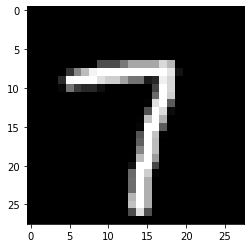

In [ ]:
plt.figure()
plt.imshow(x_train[5786], cmap='gray')
plt.show()

#print(y_train[0])
#print(y_train.shape) >> yields 60,000

In [ ]:
# Build a model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), tf.keras.layers.Dense(128, activation = 'relu'), tf.keras.layers.Dense(10, activation = 'softmax')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
#optimizer, how the model is updated with our data
#loss function, measures the error of he model

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4721 - val_loss: 0.4992
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - val_loss: 0.3360
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - val_loss: 0.2562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2525 - val_loss: 0.2338
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2311 - val_loss: 0.2765
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2192 - val_loss: 0.2749
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2135 - val_loss: 0.2502
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2066 - val_loss: 0.2812
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1983 - val_loss: 0.2600
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.187

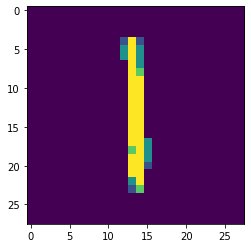

1


In [ ]:
random_idx = random.randint(0, x_test.shape[0]-1)
plt.figure()
plt.imshow(x_test[random_idx])
plt.show()

tensor = tf.reshape(x_test[random_idx], [1,28,28])

predicted_value = model.predict(tensor)

predicted_value = np.argmax(predicted_value)
print(predicted_value)

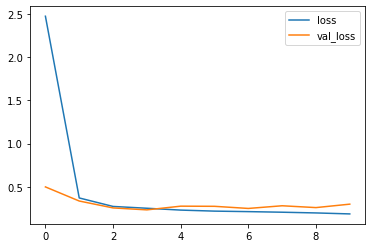

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()